# Single Neural Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [2]:
# Import Penguin Dataset as a Dataframe object
data, target = datasets.load_wine(return_X_y=True, as_frame=True)

Here we would like to show linearly and non-linearly separable data. We want only datasets with group 0 and 1.

In [3]:
y = target.iloc[:130].to_numpy()
X = data.iloc[:130]
group_0 = X[:59]
group_1 = X[59:]
group_0.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Linearly Separable Data vs. Non-linearly Separable Data

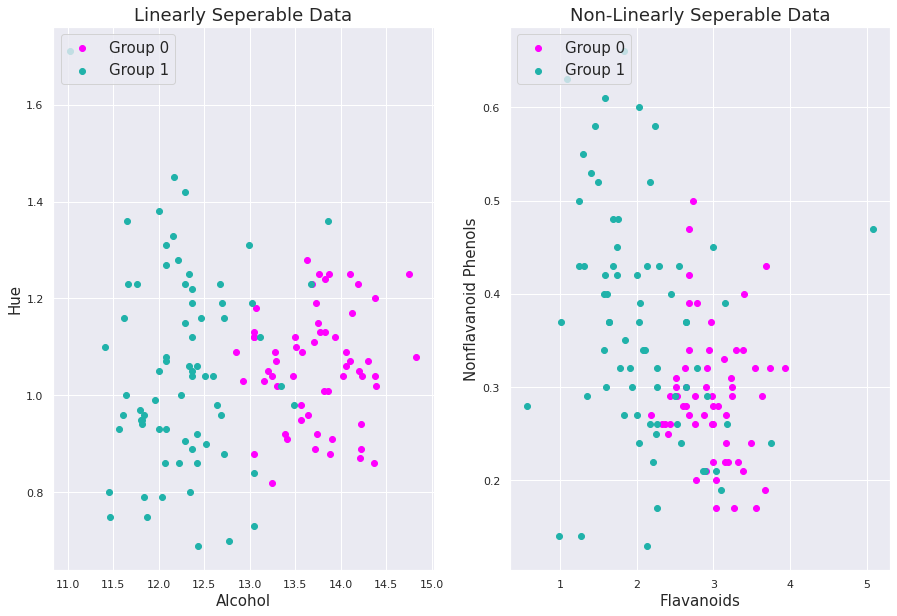

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(group_0.alcohol, 
            group_0.hue, 
            color = "magenta", 
            label = "Group 0")
ax1.scatter(group_1.alcohol, 
            group_1.hue, 
            color = "lightseagreen", 
            label = "Group 1")
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("Hue", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)

ax2.scatter(group_0.flavanoids, 
            group_0.nonflavanoid_phenols,
            color = "magenta", 
            label = "Group 0")
ax2.scatter(group_1.flavanoids, 
            group_1.nonflavanoid_phenols, 
            color = "lightseagreen", 
            label = "Group 1")
ax2.set_xlabel("Flavanoids", fontsize = 15)
ax2.set_ylabel("Nonflavanoid Phenols", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()


We will build the single neuron class and define sigmoid activation function and MSE cost function. The sigmoid activation functionis visualized as below.

In [5]:
# Single Neuron Class
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        return fig

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

## Sigmoid Activation Function

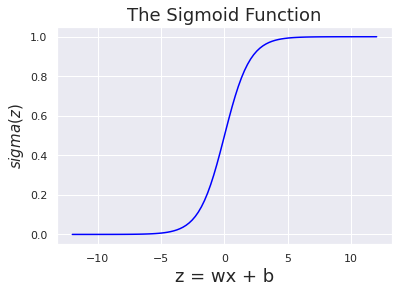

In [6]:
# Define sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Define MSE cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


domain = np.linspace(-12.0, 12.0, 100)
plt.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
plt.xlabel("z = wx + b", fontsize = 18)
plt.ylabel("$sigma(z)$", fontsize = 15)
plt.title("The Sigmoid Function", fontsize = 18)
plt.show()

In [35]:
X1 = X['flavanoids'].values
X1 = X1.reshape(-1, 1)

node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X1, y, alpha = 0.01, epochs = 1000)

## Cost Function

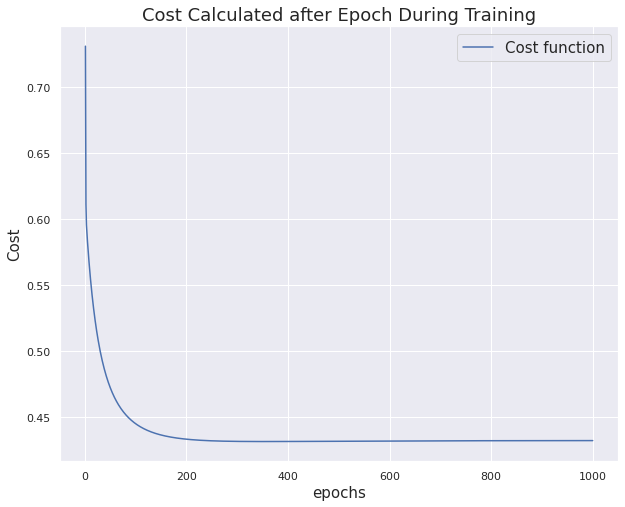

In [36]:
node.plot_cost_function()
plt.show()

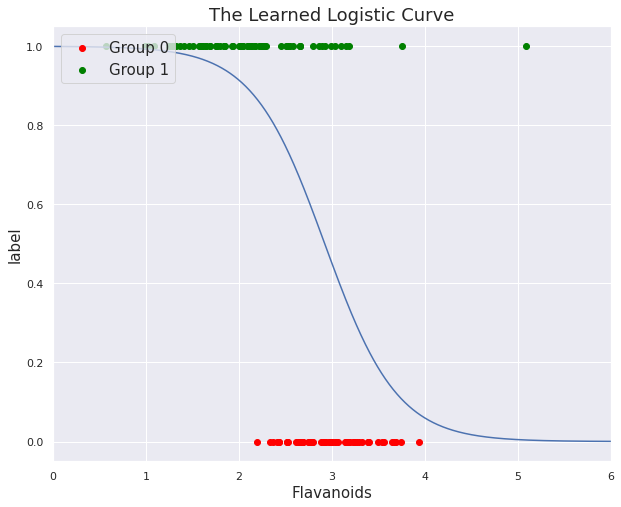

In [37]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 6))
plt.scatter(group_0.flavanoids, 
            np.zeros(np.size(group_0.flavanoids)), 
            color = "red", 
            label = "Group 0")
plt.scatter(group_1.flavanoids, 
            np.ones(np.size(group_1.flavanoids)), 
            color = "green", 
            label = "Group 1")


domain = np.linspace(0, 6, 1000)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Flavanoids", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [38]:
node.predict(X1)

array([0.41210703, 0.6019963 , 0.30646612, 0.18883936, 0.64410715,
       0.23125847, 0.73672807, 0.74166998, 0.46252508, 0.35755837,
       0.26468211, 0.77898255, 0.6019963 , 0.12235983, 0.13680368,
       0.5073155 , 0.36346826, 0.22673255, 0.07007668, 0.43085672,
       0.34586902, 0.7876833 , 0.52651741, 0.80432642, 0.68961412,
       0.64996161, 0.48809198, 0.86703442, 0.46890362, 0.81996311,
       0.30104472, 0.33436292, 0.64410715, 0.61421388, 0.73172582,
       0.46252508, 0.64996161, 0.77898255, 0.67291759, 0.42458197,
       0.27991804, 0.64996161, 0.16287167, 0.67853465, 0.44980677,
       0.66725051, 0.34586902, 0.23125847, 0.50090726, 0.16998343,
       0.29036787, 0.45615878, 0.10924796, 0.58343361, 0.51372134,
       0.58965028, 0.44980677, 0.31194158, 0.12797307, 0.99759517,
       0.99094054, 0.97965814, 0.94786575, 0.38750737, 0.95270637,
       0.66725051, 0.34009239, 0.91388763, 0.98457938, 0.98533877,
       0.99241742, 0.53927875, 0.9411558 , 0.52012268, 0.88112

In [39]:
np.rint(node.predict(X1)) != y

array([False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,

## Classification Error

In [40]:
classification_error = (np.rint(node.predict(X1)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.26153846153846155


The Error for the analysis is small enough for the training data.

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


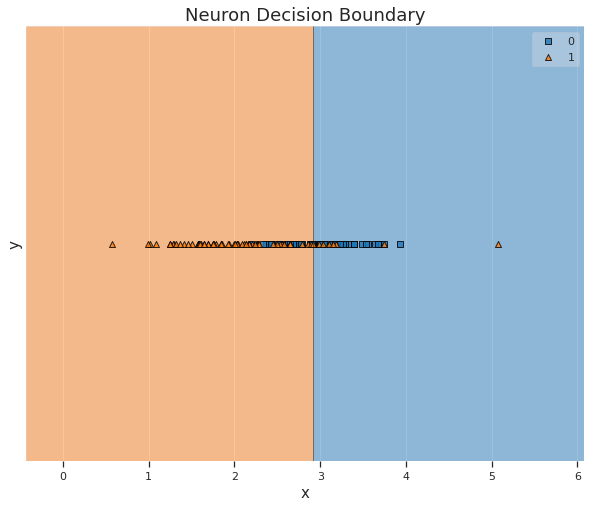

In [41]:
node.plot_decision_boundary(X1, y)
plt.show()